In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
titanic = pd.read_csv("C:\\Users\\eli\\Desktop\\titanic.csv")
titanic.head()

,Pclass,Gender,Age,SibSp,ParCh,Fare,Embarked,Status
0,1,Female,29.0,0,0,211.34,Southampton,S
1,1,Male,0.9,1,2,151.55,Southampton,S
2,1,Female,2.0,1,2,151.55,Southampton,D
3,1,Male,30.0,1,2,151.55,Southampton,D
4,1,Female,25.0,1,2,151.55,Southampton,D


# Cleaning Data

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1309 non-null   int64  
 1   Gender    1309 non-null   object 
 2   Age       1046 non-null   float64
 3   SibSp     1309 non-null   int64  
 4   ParCh     1309 non-null   int64  
 5   Fare      1308 non-null   float64
 6   Embarked  1307 non-null   object 
 7   Status    1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 81.9+ KB


In [4]:
titanic.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305     True
1306    False
1307    False
1308    False
Length: 1309, dtype: bool

In [5]:
titanic.drop_duplicates(inplace = True)

In [6]:
titanic.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1303    False
1304    False
1306    False
1307    False
1308    False
Length: 1108, dtype: bool

In [7]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1108 non-null   int64  
 1   Gender    1108 non-null   object 
 2   Age       973 non-null    float64
 3   SibSp     1108 non-null   int64  
 4   ParCh     1108 non-null   int64  
 5   Fare      1107 non-null   float64
 6   Embarked  1106 non-null   object 
 7   Status    1108 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 77.9+ KB


In [8]:
titanic["Age"].fillna(titanic["Age"].mean(), inplace = True ) 
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1108 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1108 non-null   int64  
 1   Gender    1108 non-null   object 
 2   Age       1108 non-null   float64
 3   SibSp     1108 non-null   int64  
 4   ParCh     1108 non-null   int64  
 5   Fare      1107 non-null   float64
 6   Embarked  1106 non-null   object 
 7   Status    1108 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 77.9+ KB


In [9]:
titanic["Fare"].fillna(titanic["Fare"].mean(), inplace = True)

In [10]:
titanic = titanic.replace('NA', np.nan)
titanic.dropna(inplace = True)

In [11]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1106 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    1106 non-null   int64  
 1   Gender    1106 non-null   object 
 2   Age       1106 non-null   float64
 3   SibSp     1106 non-null   int64  
 4   ParCh     1106 non-null   int64  
 5   Fare      1106 non-null   float64
 6   Embarked  1106 non-null   object 
 7   Status    1106 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 77.8+ KB


In [12]:
titanic.shape

(1106, 8)

# Gender Distribution
There were more men than women on the Titanic.

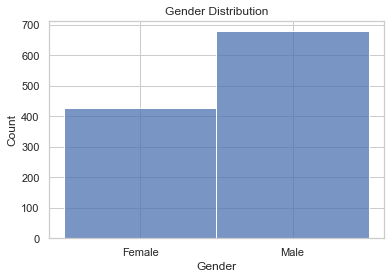

In [23]:
sns.set(style='whitegrid')
plt.figure(figsize=(6, 4))
sns.histplot(data = titanic, x = "Gender")
plt.title("Gender Distribution")
plt.show()

How many of the men and women survived?
We see that a significantly higher percentage of men died. Most of the women survived.

<Figure size 720x360 with 0 Axes>

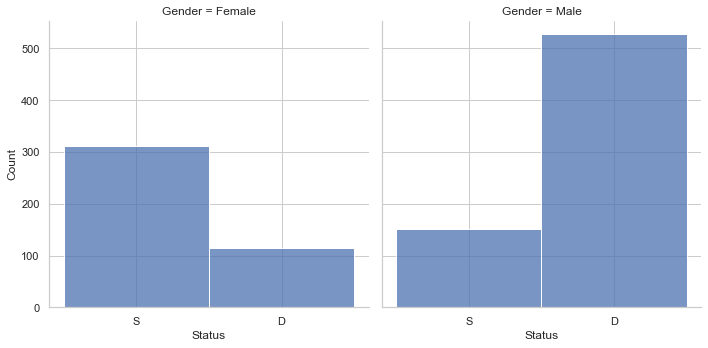

In [137]:
sns.set(style='whitegrid')
sns.displot(data = titanic, x = "Status", col = "Gender")
plt.show()

# Age Distribution
The most people on "Titanic" are between 20 and 40 years old. The most of died people are also between 20 and 40 years old.

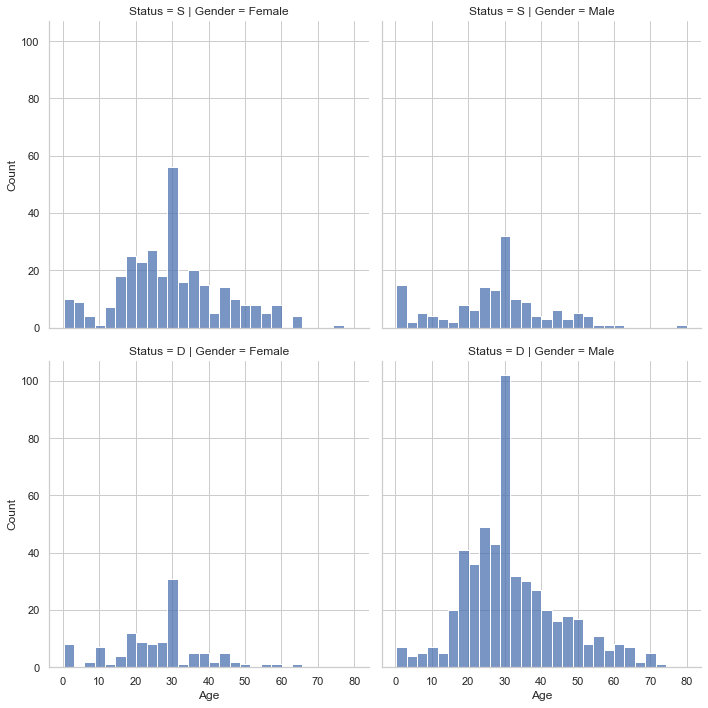

In [133]:
sns.set(style='whitegrid')
sns.displot(data = titanic, x = "Age", col = "Gender", row = "Status")
plt.show()

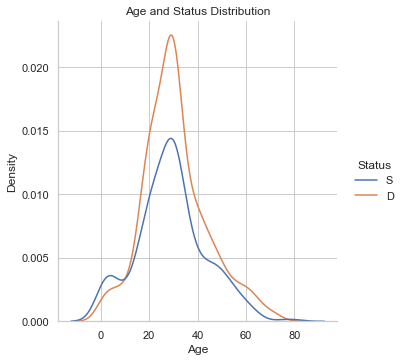

In [87]:
sns.set(style='whitegrid')
sns.displot(data = titanic, x = "Age",kind = "kde", hue = "Status")
plt.title("Age and Status Distribution")
plt.show()

The mean age of survived and dead people is almost the same - 30 years.

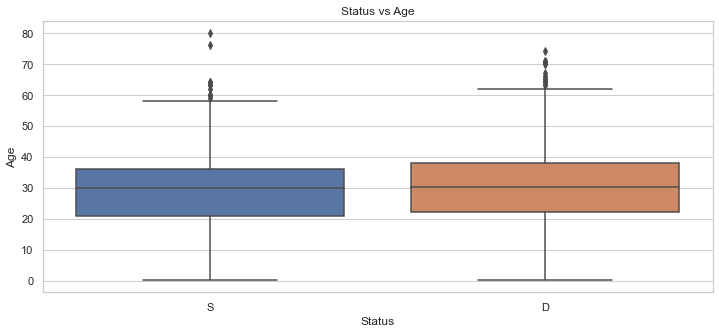

In [85]:
sns.set(style='whitegrid')
plt.figure(figsize=(12, 5))
sns.boxplot(data = titanic, x = "Status", y = "Age")
plt.title("Status vs Age")
plt.show()

Interesting facts: there are 5 people above 60 years old who survived and there are more than 10 children under 10 years old who did not survive.

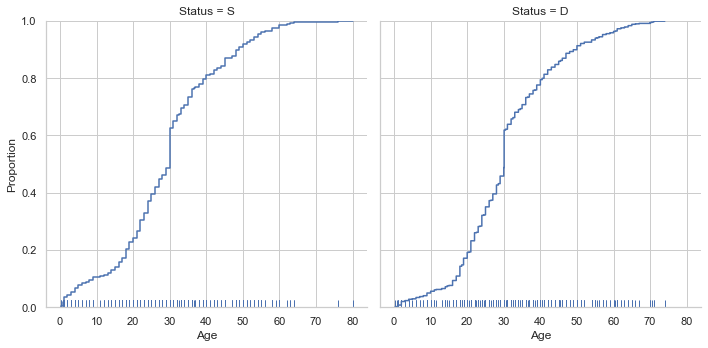

In [130]:
sns.set(style='whitegrid')
sns.displot(data = titanic, x = "Age", col = "Status", rug = True, kind = "ecdf")
plt.show()

I want to know which class are the survived and the died children under and equal to 10 years. Almost the all died children are third class, but there is only one two years old child from the first class died. Actually only two children from the third class survived. There are not died children from the middle class.

In [39]:
titanic[titanic["Age"] <= 10].pivot_table(titanic,index = ["Age","Pclass","Status"])

Fare     ParCh     SibSp
Age  Pclass Status                                
0.2  3      S        20.580000  2.000000  1.000000
0.3  3      D        14.400000  2.000000  0.000000
0.4  3      S         8.520000  1.000000  0.000000
0.7  2      S        14.500000  1.000000  1.000000
0.8  2      S        23.875000  1.500000  0.500000
     3      D        13.780000  1.000000  1.000000
            S        14.305000  1.000000  1.000000
0.9  1      S       151.550000  2.000000  1.000000
     2      S        27.750000  2.000000  1.000000
1.0  2      S        39.193333  1.666667  1.000000
     3      D        32.923333  1.333333  3.333333
            S        16.037500  1.500000  0.750000
2.0  1      D       151.550000  2.000000  1.000000
     2      S        25.000000  1.000000  1.000000
     3      D        25.678571  1.285714  2.714286
            S        12.290000  1.000000  0.000000
3.0  2      S        28.776667  1.333333  1.000000
     3      D        17.430000  1.000000  2.000000
            S        23.645000  1.500000  2.500000
4.0  1      S        81.860000  2.000000  0.000000
     2      S        31.000000  1.000000  1.500000
     3      D        29.436667  1.666667  3.666667
            S        15.820000  1.250000  0.500000
5.0  2      S        27.750000  2.000000  1.000000
     3      D        31.390000  2.000000  4.000000
            S        21.043333  1.000000  2.000000
6.0  1      S       134.500000  2.000000  0.000000
     2      S        33.000000  1.000000  0.000000
     3      D        22.536667  1.333333  2.666667
            S        12.480000  1.000000  0.000000
7.0  2      S        26.250000  2.000000  0.000000
     3      D        34.410000  1.000000  4.000000
            S        15.250000  1.000000  1.000000
8.0  2      S        30.375000  1.500000  0.500000
     3      D        25.105000  1.000000  3.500000
9.0  3      D        31.183333  1.833333  3.166667
            S        13.712500  1.250000  0.500000
10.0 3      D        32.020000  1.750000  3.000000

# Pclass Distribution
The most people on Titanic are third class and the least people are middle class.

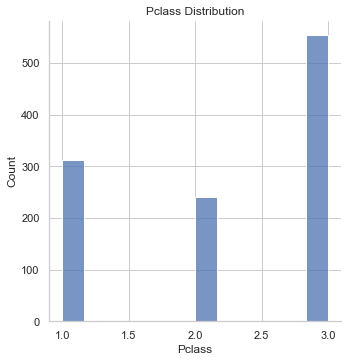

In [84]:
sns.set(style='whitegrid')
sns.displot(data = titanic, x = "Pclass")
plt.title("Pclass Distribution")
plt.show()

First class are 312 people, middle class are 240 and third class are 554.

In [31]:
titanic[["Pclass"]].value_counts()

Pclass
3         554
1         312
2         240
dtype: int64

The most of survived people are first class and the most of dead people are third class.

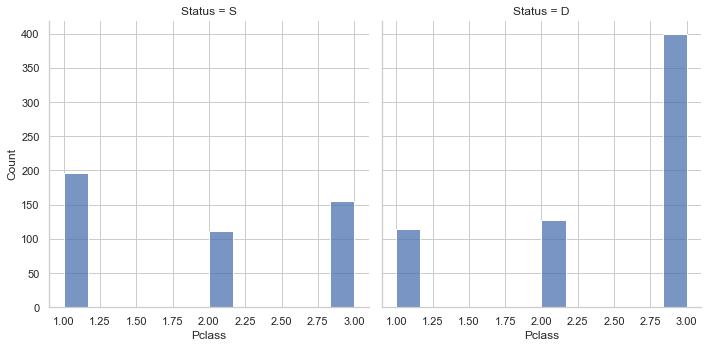

In [128]:
sns.set(style='whitegrid')
sns.displot(data = titanic, x = "Pclass", col = "Status")
plt.show()

The first class are the oldest and the third class are the youngest.

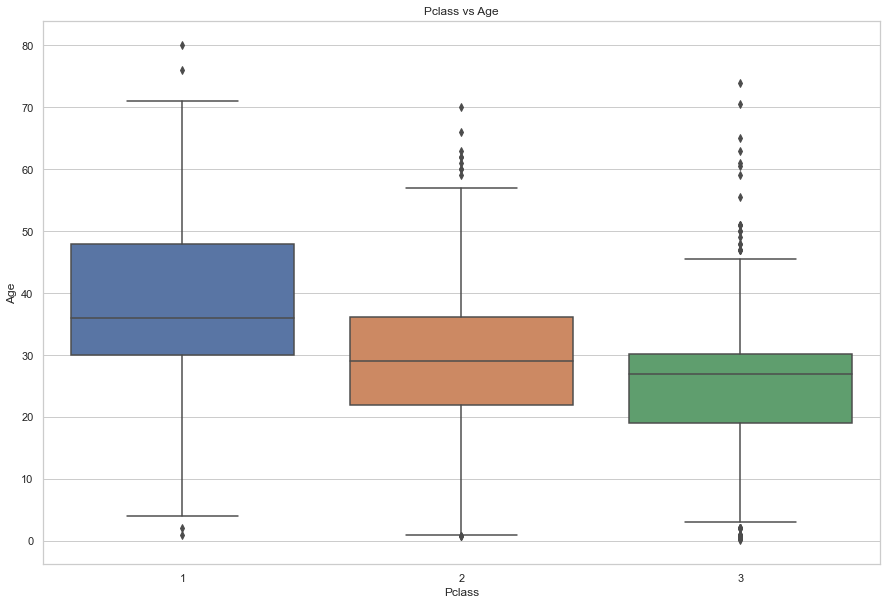

In [82]:
sns.set(style='whitegrid')
plt.figure(figsize=(15, 10))
sns.boxplot(data = titanic, x = "Pclass", y = "Age")
plt.title("Pclass vs Age")
plt.show()

The most of the survived people are first class. The most of dead people are third class.

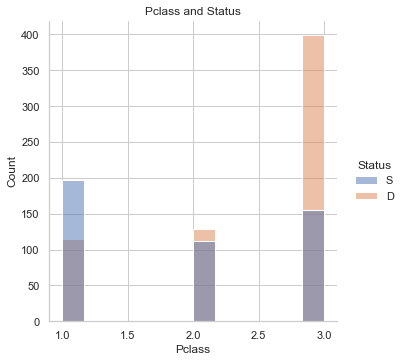

In [81]:
sns.set(style='whitegrid')
sns.displot(data = titanic, x = "Pclass", hue = "Status")
plt.title("Pclass and Status")
plt.show()

The most of the men are third class and the most of the women are also third class.

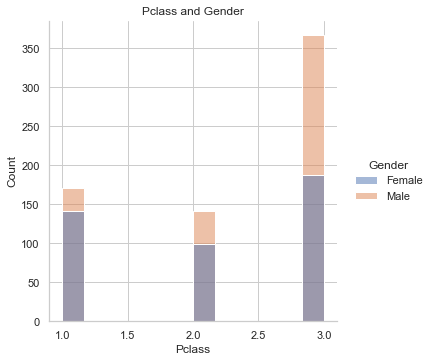

In [80]:
sns.set(style='whitegrid')
sns.displot(data = titanic, x = "Pclass", hue = "Gender")
plt.title("Pclass and Gender")
plt.show()

# Distribution of the cities from which passengers boarded

The most people boardered the ship from Southampton.

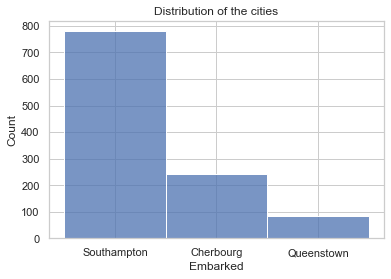

In [77]:
sns.histplot(data = titanic, x = "Embarked")
plt.title("Distribution of the cities")
plt.show()

The most of the people who survived are from Southampton.

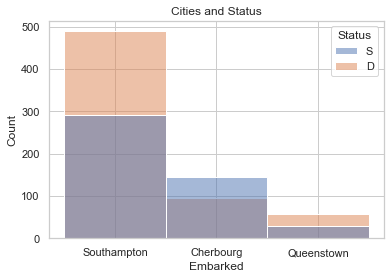

In [78]:
sns.histplot(data = titanic, x = "Embarked", hue = "Status")
plt.title("Cities and Status")
plt.show()

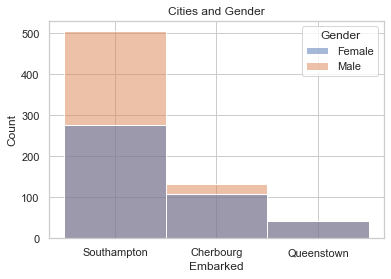

In [79]:
sns.histplot(data = titanic, x = "Embarked", hue = "Gender")
plt.title("Cities and Gender")
plt.show()

# Fare Distribution

The average fare is $37. The max fare is 512.33 and standard deviation is 55. 
For the most people the fare is under 100.

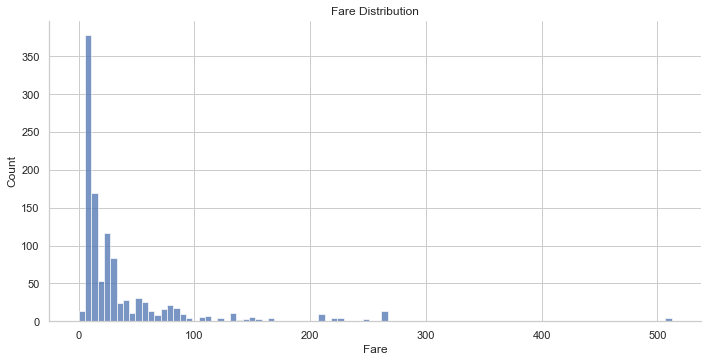

In [76]:
sns.displot(data = titanic, x = "Fare", aspect = 2)
plt.title("Fare Distribution")
plt.show()

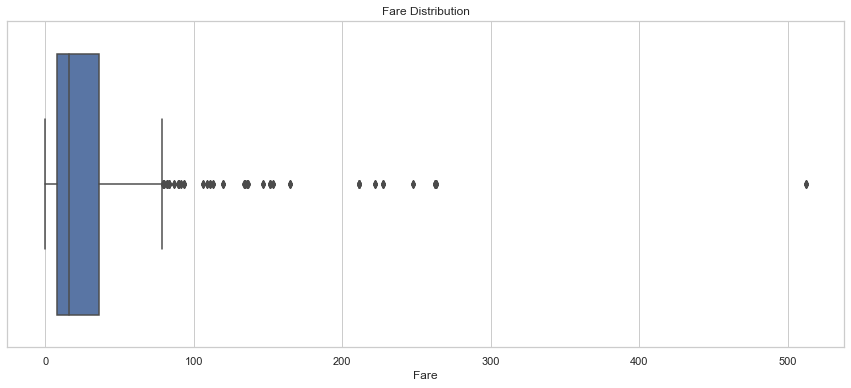

In [83]:
plt.figure(figsize=(15, 6))
sns.boxplot(data = titanic, x = "Fare")
plt.title("Fare Distribution")
plt.show()

In [165]:
titanic["Fare"].mean()

36.746885135036074

In [197]:
titanic["Fare"].max()

512.33

In [222]:
titanic["Fare"].std()

55.15946388433532

The most of the people with fare above $80 survived.

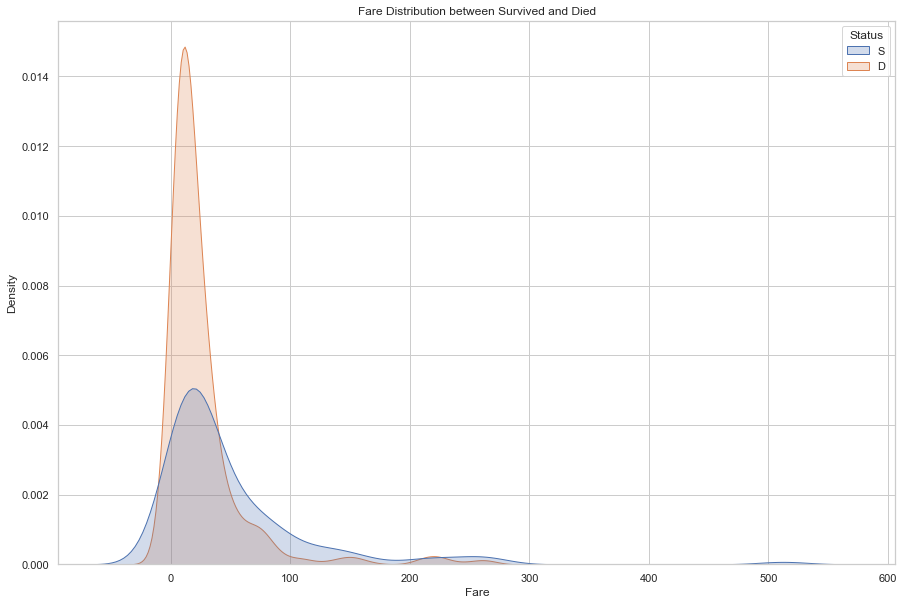

In [75]:
plt.figure(figsize=(15, 10))
sns.kdeplot(data = titanic, x = "Fare", hue = "Status", shade = "True")
plt.title("Fare Distribution between Survived and Died")
plt.show()

The most of the people with higher than average fare are first class. There are only 5 people third class with higher than average fare. I want to know what happened with these people. Answer: everybody of them is dead.

In [44]:
dx = titanic[["Fare", "Pclass"]]
pd.crosstab(dx["Fare"], dx["Pclass"]).tail(50)

Pclass,1,2,3
Fare,,,
61.98,2,0,0
63.36,2,0,0
65.00,0,4,0
66.60,2,0,0
69.30,1,0,0
69.55,0,0,5
71.00,2,0,0
71.28,2,0,0
73.50,0,6,0


In [45]:
titanic[titanic["Fare"] == 69.55]["Status"]

1170    D
1171    D
1172    D
1179    D
1180    D
Name: Status, dtype: object

# Correlation

Is there any correlation between Age and Fare?

There is no correlation between Age and Fare because for the most people the fare is under $100.
The plot clearly shows that the most of the people with higher than average fare survived.

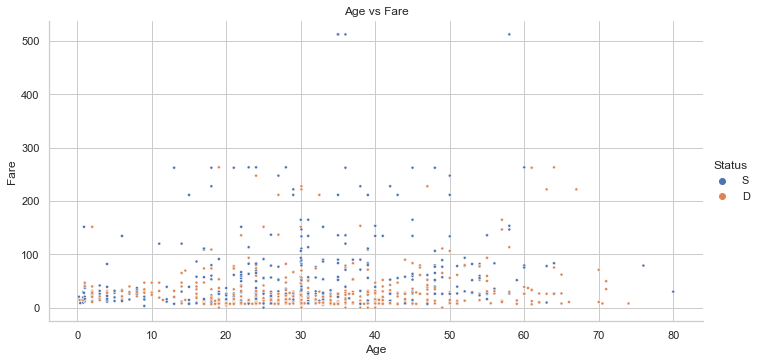

In [72]:
sns.relplot(data = titanic, x = "Age", y = "Fare", hue = "Status", aspect = 2, marker = ".")
plt.title ("Age vs Fare")
plt.show()

The most of the people are between 20 and 40 years old with fare under 100.

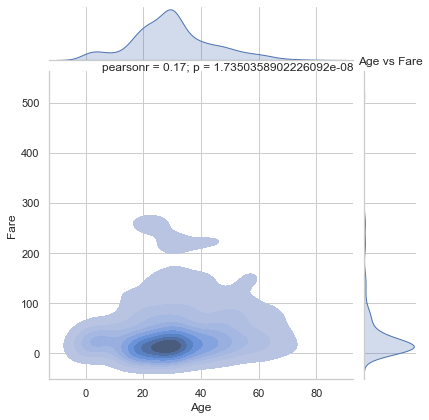

In [71]:
jg = sns.jointplot(x="Age", y="Fare", data=titanic, kind='kde', fill=True)
df = titanic[["Age", "Fare"]]
pearsonr, p = stats.pearsonr(df["Age"], df["Fare"])
pearson_str = f'pearsonr = {pearsonr:.2f}; p = {p}'
jg.ax_joint.text(
    jg.ax_joint._axes.xaxis.get_data_interval()[1], 
    jg.ax_joint._axes.yaxis.get_data_interval()[1], 
    pearson_str, 
    horizontalalignment='right')
plt.title("Age vs Fare")
plt.show()

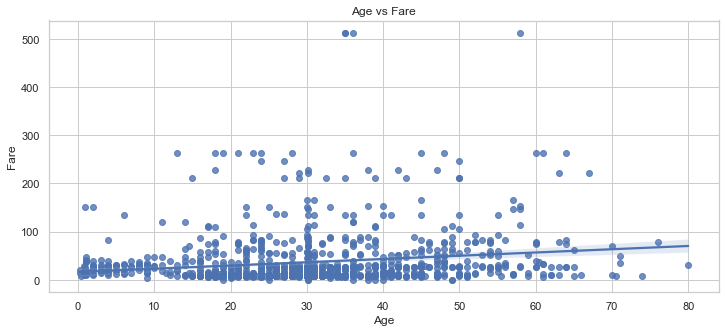

In [70]:
plt.figure(figsize=(12, 5))
sns.regplot(data = titanic, x = "Age", y = "Fare")
plt.title("Age vs Fare")
plt.show()

I want to know if the people with the fare above $500 survived and which are there ages.
The result is that all of these people survived.

In [223]:
new_df = titanic[titanic["Fare"] > 500]
new_df

,Pclass,Gender,Age,SibSp,ParCh,Fare,Embarked,Status
49,1,Male,36.0,0,1,512.33,Cherbourg,S
50,1,Female,58.0,0,1,512.33,Cherbourg,S
183,1,Male,35.0,0,0,512.33,Cherbourg,S
302,1,Female,35.0,0,0,512.33,Cherbourg,S


I want to know the number of the people with the fare above 200. How many of these people survived?
26 of these people survived and only 12 died.

In [230]:
df_s = titanic[(titanic["Fare"] > 200) & (titanic["Status"] == "S")]
len(df_s)

26

In [232]:
df_d = titanic[(titanic["Fare"] > 200) & (titanic["Status"] == "D")]
len(df_d)

12